# Zomato EDA

In [57]:
# Importing the Libraries
# https://pandas.pydata.org/docs/
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [58]:
df = pd.read_csv("C:\\Users\\harip\\Desktop\\Projects\\data\\Zomatodataset\\zomato.csv",encoding='latin-1')
# have some uni-code issue / encoding formate , latin-1 is used for encoding issue

In [59]:
df.head(2)
# Imported and Checking 

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591


In [60]:
# Checking all the col
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [61]:
# Checking the rows and column
df.shape

(9551, 21)

In [62]:
# One more way of understanding data
df.info()
# Object -> Categorical or Numerical
# int64 -> Numerical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [63]:
# Help you find all the statistical values, They take only the integer features 
round(df.describe(),2)

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9551.00,9551.00,9551.00,9551.00,9551.00,9551.00,9551.00,9551.00
mean,9051128.35,18.37,64.13,25.85,1199.21,1.80,2.67,156.91
std,8791521.28,56.75,41.47,11.01,16121.18,0.91,1.52,430.17
min,53.00,1.00,-157.95,-41.33,0.00,1.00,0.00,0.00
25%,301962.50,1.00,77.08,28.48,250.00,1.00,2.50,5.00
50%,6004089.00,1.00,77.19,28.57,400.00,2.00,3.20,31.00
75%,18352291.50,1.00,77.28,28.64,700.00,2.00,3.70,131.00
max,18500652.00,216.00,174.83,55.98,800000.00,4.00,4.90,10934.00


*   BASICS ANALYSIS STEPS
1. FIND MISSING VALUES 
2. EXPLORE NUMERICAL AND CATEGORICAL VALUE
3. FIND THE CORELATION 

In [64]:
# Find the Missing / Null Value
df.isnull().sum()
# found 9 missing values in cosine

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [65]:
# In another way we can use is
[each_col for each_col in df.columns if df[each_col].isnull().sum()>0]
# Basically defines for each col in every col in data if it has null value > 0 return

['Cuisines']

<Axes: >

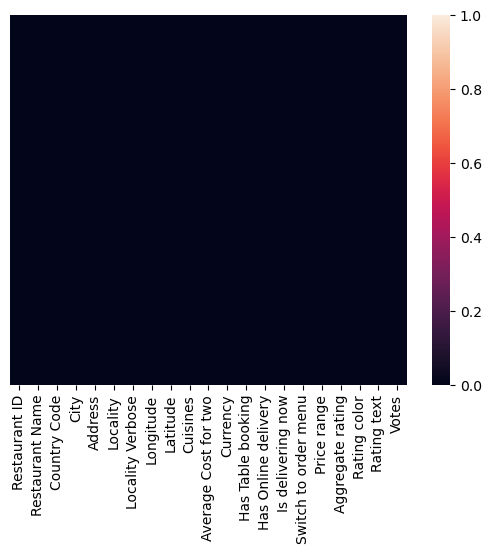

In [66]:
# Heatmap
sns.heatmap(df.isnull(),yticklabels=False,cbar=True)

In [67]:
df_country = pd.read_excel('C:\\Users\\harip\\Desktop\\Projects\\data\\Zomatodataset\\Country-Code.xlsx')
df_country

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [68]:
df['Country Code'].head(3)

0    162
1    162
2    162
Name: Country Code, dtype: int64

In [69]:
# Here we are combing two data-frames on the county code by using merge() , more time you run more col gets added 
df = pd.merge(df,df_country,on='Country Code',how='left').head(3)
# here on merge(dataset you want to add data, data set from which you want data, what data you need to merge, how = which dataset to take)
# here we are basically merging the county assigned to code with the country

In [70]:
df.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
